This notebook has been inspired by the book from Sebastian Raschka "Python Machine Learning".

## Multi Layer Perceptron

We are going in this notebook to code a multi layer perceptron from scratch. A multi layer perceptron is a sequence of matrix computation, each followed by a non- linear function. In this notebook we are going to use as non linear function the sigmoid - even if currently ReLu is a more used function. We are going to show how to code a simple neural network.



### Exercise 1 - Define a function that compute the sigmoid and plot the function

The sigmoid is defined as:

$$
\phi(z) = \frac{1}{1+e^{-z}}
$$

In [1]:
import numpy as np

def sigmoid(z):
    ## compute the sigmoid
    return 1.0/(1+np.exp(-z))

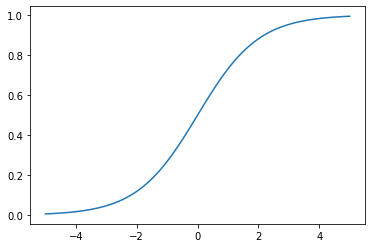

In [2]:
x = np.linspace(-5,5,100)
y = [sigmoid(z) for z in x]

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y)

### Exercise 2 - one hot function

Write a function that takes in input a list of values and returns the one_hot values of them.

In [2]:
def one_hot(y):
    n_classes = np.sort(np.unique(y))
    values = {n_class: i for i, n_class in enumerate(n_classes)}
    onehot = np.zeros((len(y), len(n_classes)))
    for idx, val in enumerate(y):
        onehot[ idx, values[val]] = 1.
    return onehot

In [3]:
assert (one_hot([1,2]) == np.array([[1,0], [0., 1]]) ).all()
assert (one_hot([2,1]) == np.array([[0,1], [1., 0]]) ).all()
assert (one_hot([2, 1,2,3,1, 4]) == np.array([[0.,1.,0.,0.], [1,0.,0.,0.], [0.,1.,0., 0], [0, 0, 1, 0], [1.,0.,0.,0.], [0., 0., 0., 1.]])).all()

### Exercise 3 - Cost function - logistic cost function

We are going to use as cost function the logistic cost function (with no regularization). We are also going to normalize the logistic cost functionwith respect to the number of values we are considering, to be able to evaluate it on datasets of different lenghts.

$$
C =-\frac{1}{n} \sum_{1}^{n}{y^{i}*\log(f(x^{i}))+(1-y^{i}) *\log(1-f(x^{i})}
$$

where

- n isthe number of datapoints
- $y^{i}$ is the label for the $i^{th}$ element
- $f$ is the prediction function
- $x^{i}$ is the $i^{th}$ element of the dataset


In [6]:
import numpy as np

def cost_function(y_label, prediction):
    term1 = y_label * (np.log(prediction))
    term2 = (1. - y_label) * np.log(1. - prediction)
    return -np.sum(term1 + term2)/len(y_label)



In [7]:
assert np.abs(cost_function(np.array([[1,0]]), np.array([[0.9,0.1]])) - 0.21072103131565256) < 0.000001
assert np.abs(cost_function(np.array([[1,0,], [0, 1]]), np.array([[0.999,0.1], [0.5, 0.5]])) - 0.7463276885556502) < 0.000001

###  Exercise 4 - Forward propagation 

In the following we are going to consider a multi-layer perceptron having only one hidden layer of a certain size. The non-linear function is going to be the sigmoid.

Let X be data. The algorithm to compute the forward pass is the following:


$
z_{h} = X*w_{h} + b_{h} \\
a_{h} = \phi(z_{h}) \\
z_{out} = a_{h}*w_{out} + b_{out} \\
a_{out} = \phi(z_{out})
$

Function should return values for $z_{h}, a_{h}, z_{out}, a_{out}$.

In [8]:
def forward(X, w_h, b_h, w_out, b_out):
    z_h = np.dot(X, w_h) + b_h
    a_h = sigmoid(z_h)
    
    z_out = np.dot(a_h, w_out) + b_out
    a_out = sigmoid(z_out)
    
    return z_h, a_h, z_out, a_out

In [9]:
forward_X_test = [[1,0,1]]
forward_wh_test = [[0,1], [1,0], [1,1]]
forward_bh_test = [1,1]
forward_wout_test = [[1,4,5], [2,-1, -1]]
forward_bout_test = [1,2,-1]

t1, t2, t3, t4 = forward(forward_X_test, forward_wh_test,forward_bh_test, forward_wout_test, forward_bout_test)

assert (t1 == np.array([[2,3]])).all()
assert (t2 - np.array([[0.88079708, 0.95257413]]) < 0.00001).all()
assert (t3 - np.array([[3.78594533 ,4.57061419, 2.45141126]]) < 0.000001).all()
assert (t4 - np.array([[0.99987661, 0.99908895, 0.99752738]]) < 0.00001).all()

### Exercise 5 - Back propagation

We are going to need before being able to train a neural network, the back propagation step. In this step we are going to compute the error the model is doing with respect to the true label and backpropagate this information to every layer. Then we will update the weight of each layer with the information from the gradient.

We are going to compute:

$
\delta_{out} = a_{out} - y \\
\frac{\partial \phi(z_{h})}{\partial z_{h}} = a_{h}*(1-a_{h}) \\
\delta_{h} = (\delta_{out}*w_{out}^{T})*(a_{h}*(1-a_{h})) \\
\nabla(w_{h}) = X^{T}*\delta_{h} \\
\nabla(b_{h}) = \sum{\delta_{h}} \\
\nabla(w_{out}) = a_{h}^{T}*\delta_{out} \\
\nabla(b_{out}) = \sum{\delta_{out}}
$

It should return the values of

$
\nabla(w_{h}) \\
\nabla(b_{h}) \\
\nabla(w_{out}) \\
\nabla(b_{out})
$

In [10]:
def backpropagation(X, y, z_h, a_h, z_out, a_out, w_out):
    delta_out = a_out - y

    sigmoid_derivative_h = a_h * (1. - a_h)

    delta_h = (np.dot(delta_out, w_out.T) *
               sigmoid_derivative_h)

    grad_w_h = np.dot(X.T, delta_h)
    grad_b_h = np.sum(delta_h, axis=0)

    grad_w_out = np.dot(a_h.T, delta_out)
    grad_b_out = np.sum(delta_out, axis=0)

    return grad_w_h, grad_b_h, grad_w_out, grad_b_out
    
    

In [11]:
g1, g2, g3, g4 = backpropagation(np.array(forward_X_test), [0,1,0], t1, t2, t3, t4, np.array(forward_wout_test))


assert np.abs((g1 - np.array([[0.58168091, 0.04721922],
 [0.  ,       0.        ],
 [0.58168091, 0.04721922]]))).sum() < 0.0001
assert np.abs((g2 - np.array([0.58168091, 0.04721922]))).sum() < 0.0001
assert np.abs((g3 - np.array([[ 0.86125738, -0.00902424,  0.81091868],
 [ 0.93144212, -0.00975964,  0.87700127]]))).sum() < 0.0001
assert np.abs((g4 - np.array([ 0.97781589, -0.01024554,  0.92066459]))).sum() < 0.0001


### Exercice 6 - Putting all together

We are going to create a class called MultiLayerPerceptron that takes as input in the init:

- the number of features of the dataset X $n_{features}$
- the number of hidden neurons $n_{hidden}$
- the number of output neurons $n_{output}$ (number of unique labels in target)

We are going to initiate as class variables:
- bias vector $b_{h}$ as a set of zeros of length $n_{hidden}$
- matrix $w_{h}$ as a random normal matrix with size $(n_{features}, n_{hidden})$
- bias vector $b_{out}$ as a set of zeros of length $n_{output}$
- matrix $w_{out}$ as a random normal matrix with size $(n_{hidden}, n_{output})$

Then we will integrate the two functions forward and backprop by using the class variables instead of having a static function. We are going to use both in the train method

In [12]:
import random


class MultiLayerPerceptron:
    def __init__(self, n_features, n_hidden, n_output):
        self.b_h = np.zeros(n_hidden)
        self.w_h = np.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = np.random.normal(loc=0.0, scale=0.1,
                                        size=(n_hidden, n_output))
        
    def forward(self, X):
        z_h = np.dot(X, self.w_h) + self.b_h
        a_h = sigmoid(z_h)
    
        z_out = np.dot(a_h, self.w_out) + self.b_out
        a_out = sigmoid(z_out)

        return z_h, a_h, z_out, a_out
    
   
    
    
    def backprop(self, X_batch, y_batch, z_h, a_h, z_out, a_out):
        delta_out = a_out - y_batch

        sigmoid_derivative_h = a_h * (1. - a_h)

        delta_h = (np.dot(delta_out, self.w_out.T) *
                   sigmoid_derivative_h)

        grad_w_h = np.dot(X_batch.T, delta_h)
        grad_b_h = np.sum(delta_h, axis=0)

        grad_w_out = np.dot(a_h.T, delta_out)
        grad_b_out = np.sum(delta_out, axis=0)

        return grad_w_h, grad_b_h, grad_w_out, grad_b_out

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size, learning_rate):
        epoch_loss_train = []
        epoch_loss_val = []
        batch_loss = []
        
        for idx_epoch in range(epochs):
            # iterate over minibatches
            indices = np.arange(X_train.shape[0])
            batch_num = 1
            random.shuffle(indices)
            for start_idx in range(0, indices.shape[0] - batch_size + 1, batch_size):
                batch_idx = indices[start_idx:start_idx + batch_size]

                X_batch = X_train[batch_idx]
                y_batch = y_train[batch_idx]
                
                # forward propagation
                z_h, a_h, z_out, a_out = self.forward(X_batch)
                
                batch_cost = cost_function(y_batch, a_out)
                batch_num += 1
                
                batch_loss.append(batch_cost)
                grad_w_h, grad_b_h, grad_w_out, grad_b_out = self.backprop(X_batch, y_batch, z_h, a_h, z_out, a_out)

                # Regularization and weight updates
                #delta_w_h = (grad_w_h + reg_rate*self.w_h)
                #delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= learning_rate * grad_w_h
                self.b_h -= learning_rate * grad_b_h

                #delta_w_out = (grad_w_out + reg_rate*self.w_out)
                #delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= learning_rate * grad_w_out
                self.b_out -= learning_rate * grad_b_out
            
            _, _, _, a_out = self.forward(X_train)
            
            cost = cost_function(y_train, a_out)
            self.predict(X_val)
            
            _, _, _, a_out_val = self.forward(X_val)
            cost_val = cost_function(y_val, a_out_val)
            epoch_loss_train.append(cost)
            epoch_loss_val.append(cost_val)
            print(f'Epoch {idx_epoch}: train {cost} - eval {cost_val}')
        return epoch_loss_train, epoch_loss_val, batch_loss
    
    def predict(self, X):
        _, _, _, prediction = self.forward(X)
        return np.argmax(prediction, axis=1)
    
    def predict_proba(self, X):
        _, _, _, prediction = self.forward(X)
        return prediction

### Import the datasets

We are going to use the digits dataset from sklearn. We will build a train, validation and test set.

In [13]:
from sklearn.datasets import load_digits

In [14]:
digits = load_digits()

In [15]:
X = digits.data
y = one_hot(digits.target)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)

### Exercice 7 - training a classifier

Create a new object nn with the correct dimension for values $n_{features}$ and $n_{output}$. You can choose the number of hidden neurons you want to use.

Call the *train* method with different epochs, batch_size and learning_rate.

In [17]:
nn_code = MultiLayerPerceptron(X_train.shape[1], 30, n_output=10)

In [18]:
epoch_value, epoch_loss_val, batch_value = nn_code.train(X_train, y_train, X_val, y_val, epochs=150, batch_size=16, learning_rate=3*1e-4)

Epoch 0: train 3.6366368061883234 - eval 3.640136076307861
Epoch 1: train 3.226868832545026 - eval 3.2328664696101335
Epoch 2: train 3.1116558569843167 - eval 3.117826299148359
Epoch 3: train 3.0361570661482498 - eval 3.0434378229546355
Epoch 4: train 2.9733918329461133 - eval 2.9848773915651092
Epoch 5: train 2.9143860458865785 - eval 2.9241259840435925
Epoch 6: train 2.8580803986561745 - eval 2.8705675150198453
Epoch 7: train 2.8039025375155413 - eval 2.817735267465021
Epoch 8: train 2.750857578954351 - eval 2.7658447917995654
Epoch 9: train 2.698398910956258 - eval 2.7143155342121332
Epoch 10: train 2.6470468922418267 - eval 2.663712284475028
Epoch 11: train 2.5961149051124037 - eval 2.613091828790932
Epoch 12: train 2.5449798655291644 - eval 2.565301450276062
Epoch 13: train 2.49389504463645 - eval 2.5146529845351298
Epoch 14: train 2.442861747604327 - eval 2.4654572759665956
Epoch 15: train 2.392788978095958 - eval 2.4168224802290186
Epoch 16: train 2.3437571371522377 - eval 2.369

### Exercice 8 - compute accuracy metrics for train, test and valuation

In [19]:
(np.argmax(y_train, axis=1) == np.argmax(nn_code.forward(X_train)[3], axis=1)).sum()/len(X_train)

0.9854439592430859

In [20]:
(np.argmax(y_test, axis=1) == np.argmax(nn_code.forward(X_test)[3], axis=1)).sum()/len(X_test)

0.9888888888888889

In [21]:
(np.argmax(y_val, axis=1) == np.argmax(nn_code.forward(X_val)[3], axis=1)).sum()/len(X_val)

0.9670781893004116

### Exercice 9 - show examples of mislabelled images for training, valuation and test sets

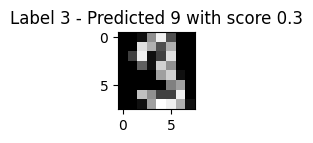

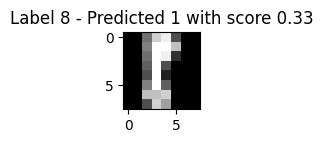

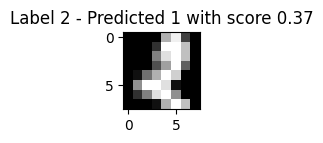

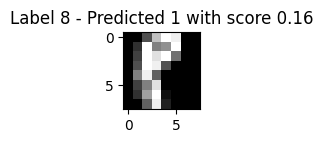

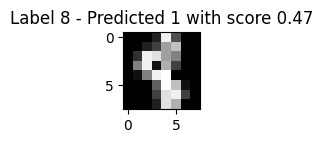

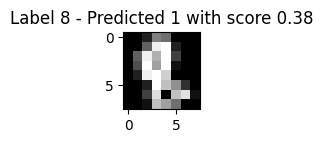

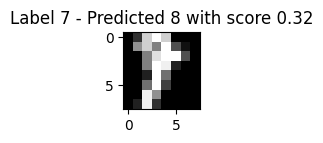

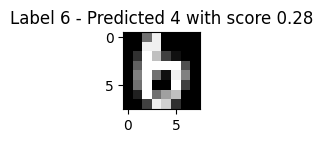

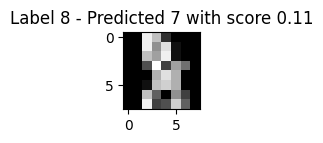

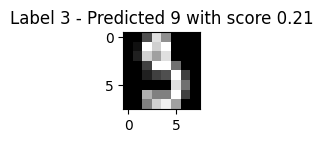

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

train_predictions = nn_code.predict_proba(X_train)
count = 0
for i, val in enumerate(train_predictions):
    if np.argmax(val) != np.argmax(y_train[i]):
        image = np.reshape(X_train[i], (8, 8))
        plt.figure(figsize=(1,1))
        plt.imshow(image, cmap='gray')
        score = int(np.max(val)*100)/100
        plt.title(f'Label {np.argmax(y_train[i])} - Predicted {np.argmax(val)} with score {score}')
        plt.show()
        count += 1
    if count == 10:
        break

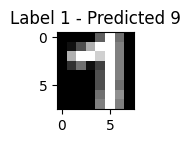

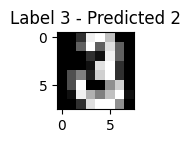

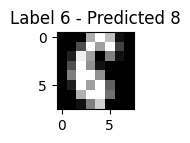

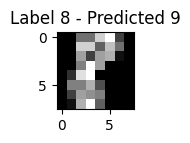

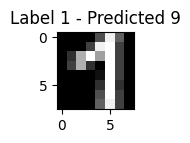

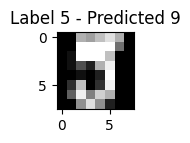

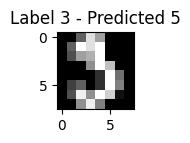

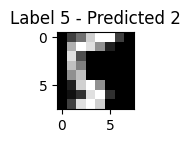

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

test_predictions = np.argmax(nn_code.forward(X_val)[3], axis=1)
for i, val in enumerate(test_predictions):
    if val != np.argmax(y_val[i]):
        image = np.reshape(X_val[i], (8, 8))
        plt.figure(figsize=(3,1))
        plt.imshow(image, cmap='gray')
        plt.title(f'Label {np.argmax(y_val[i])} - Predicted {val}')
        
        plt.show()

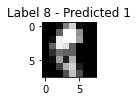

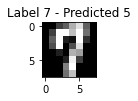

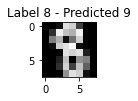

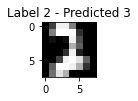

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

test_predictions = np.argmax(nn_code.forward(X_test)[3], axis=1)
for i, val in enumerate(test_predictions):
    if val != np.argmax(y_test[i]):
        image = np.reshape(X_test[i], (8, 8))
        plt.figure(figsize=(3,1))
        plt.imshow(image, cmap='gray')
        plt.title(f'Label {np.argmax(y_test[i])} - Predicted {val}')
    
        plt.show()

### Exercice 9 - plot training graphs

Plot a graph having epoch loss for train and validation sets. 

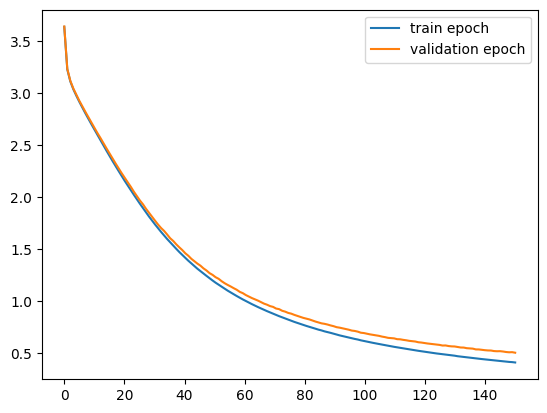

In [24]:
x_epoch = np.linspace(0, len(epoch_value), len(epoch_value))
plt.plot(x_epoch, epoch_value, label='train epoch')
plt.plot(x_epoch, epoch_loss_val, label='validation epoch')
plt.legend()
plt.show()

Add to the plot a graph having epoch loss for batch loss. 

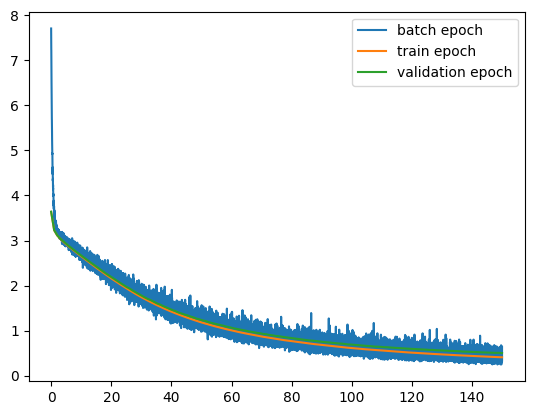

In [25]:
x_epoch = np.linspace(0, len(epoch_value), len(epoch_value))
batch_epoch = np.linspace(0, len(epoch_value), len(batch_value))
plt.plot(batch_epoch, batch_value, label='batch epoch')
plt.plot(x_epoch, epoch_value, label='train epoch')
plt.plot(x_epoch, epoch_loss_val, label='validation epoch')
plt.legend()
plt.show()

# Using pytorch

By using pytorch documentation, replicate what has been done from scratch.

Change the definition of the network to see what works better.

In [26]:
import torch
from torch import nn
import random

In [27]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(64, 40),
            nn.ReLU(),
            nn.Linear(40,10),
            nn.ReLU(),
            nn.Linear(10,10)
            )
        
    def forward(self, x):
        logits = self.model(x)
        return logits
    
       
    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size, learning_rate):
        epoch_loss_train = []
        epoch_loss_val = []
        batch_loss = []
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(self.model.parameters(), lr=learning_rate)  
        for idx_epoch in range(epochs):
            # iterate over minibatches
            indices = np.arange(X_train.shape[0])
            random.shuffle(indices)
            batch_num = 1
            for start_idx in range(0, indices.shape[0] - batch_size + 1, batch_size):
                batch_idx = indices[start_idx:start_idx + batch_size]
                optimizer.zero_grad()

                X_batch = torch.from_numpy(X_train[batch_idx])
                y_batch = torch.from_numpy(y_train[batch_idx])

                outputs = self.model(X_batch.float())
                loss = criterion(outputs, y_batch)
                
                loss.backward()
                optimizer.step()
                batch_loss.append(loss.item())
            
            pred_train = self.model(torch.from_numpy(X_train).float())
            loss_train = criterion(pred_train, torch.from_numpy(y_train).float())
            
            pred_val = self.model(torch.from_numpy(X_val).float())
            loss_val = criterion(pred_val, torch.from_numpy(y_val).float())
            print(f'Loss: {loss.item()} - {loss_val.item()}')
            epoch_loss_train.append(loss_train.item() )
            epoch_loss_val.append(loss_val.item() )

        return epoch_loss_train, epoch_loss_val, batch_loss
    
    def compute_accuracy(self, X_values, y_values):
        pred = torch.argmax(self.model(torch.from_numpy(X_values).float()), 1)
        return ((pred.detach().numpy() == np.argmax(y_values, axis=1)).sum()/len(pred))

In [28]:
torch_nn = NeuralNetwork()

In [29]:
loss_train, loss_val, batch_loss = torch_nn.train(X_train, y_train, X_val, y_val, 150, 16, 1e-3)

Loss: 2.1249952986836433 - 2.2109827995300293
Loss: 2.0865399911999702 - 2.1399760246276855
Loss: 1.943154588341713 - 2.074521064758301
Loss: 2.2116281613707542 - 2.0151445865631104
Loss: 1.9098892137408257 - 1.9532978534698486
Loss: 1.9987861849367619 - 1.8933018445968628
Loss: 1.8546353355050087 - 1.8311631679534912
Loss: 1.4774112701416016 - 1.7707656621932983
Loss: 1.4850779175758362 - 1.7071255445480347
Loss: 1.5704385098069906 - 1.6411665678024292
Loss: 2.1099940426647663 - 1.5801057815551758
Loss: 1.1466129533946514 - 1.5080281496047974
Loss: 1.0737196281552315 - 1.441831111907959
Loss: 1.0788739640265703 - 1.3699588775634766
Loss: 1.3597810324281454 - 1.2905170917510986
Loss: 1.389282114803791 - 1.2159075736999512
Loss: 1.132120934780687 - 1.1413789987564087
Loss: 1.523259961977601 - 1.072708249092102
Loss: 0.9924451634287834 - 1.0117456912994385
Loss: 0.9429117764811963 - 0.9500923156738281
Loss: 0.8031325482297689 - 0.9037712216377258
Loss: 0.7473320469725877 - 0.854741215705

### Exercice 10 

Evaluate the accuracy for train, evaluation and test set. Add a method compute_accuracy to the class NeuralNetwork

In [30]:
print(f'Accuracy for train set: {torch_nn.compute_accuracy(X_train, y_train)}')

Accuracy for train set: 0.9774381368267832


In [31]:
print(f'Accuracy for validation set: {torch_nn.compute_accuracy(X_val, y_val)}')

Accuracy for validation set: 0.9547325102880658


In [32]:
print(f'Accuracy for test set: {torch_nn.compute_accuracy(X_test, y_test)}')

Accuracy for test set: 0.9166666666666666


### Exercice 11

Plot the graphs of training for both training and evaluation set.

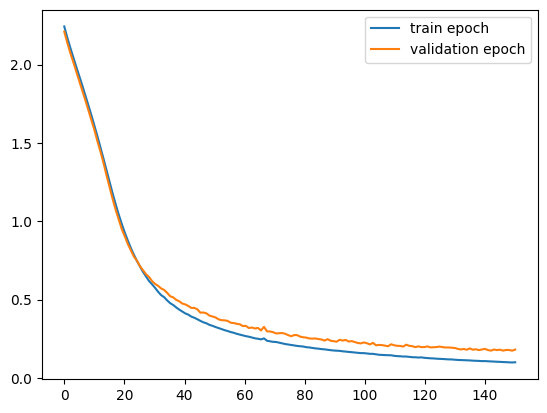

In [33]:
x_epoch = np.linspace(0, len(loss_train), len(loss_train))
plt.plot(x_epoch, loss_train, label='train epoch')
plt.plot(x_epoch, loss_val, label='validation epoch')
plt.legend()
plt.show()

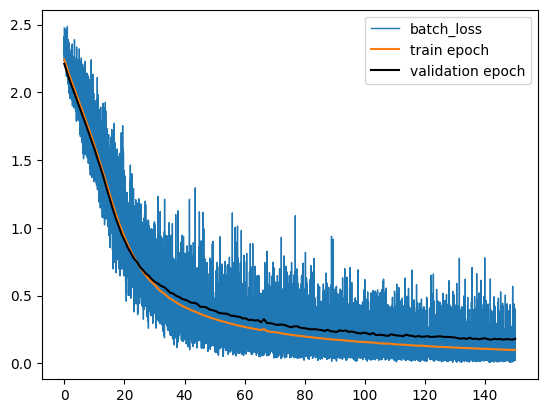

In [34]:
x_epoch = np.linspace(0, len(loss_train), len(loss_train))
batch_epoch = np.linspace(0, len(loss_train), len(batch_loss))
plt.plot(batch_epoch, batch_loss, label='batch_loss', linewidth=1)
plt.plot(x_epoch, loss_train, label='train epoch')
plt.plot(x_epoch, loss_val, label='validation epoch', color='black')
plt.legend()
plt.show()

### Exercice 12 

Find the set of images that are wrongly classified by both models.

In [35]:
pred_nn_model = nn_code.predict(X_test)
pred_pytorch = torch.argmax(torch_nn.model(torch.from_numpy(X_test).float()), 1)

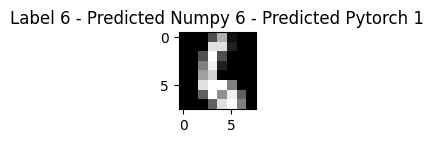

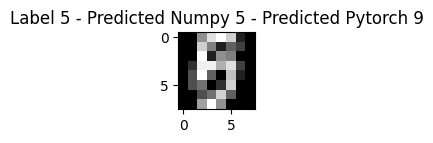

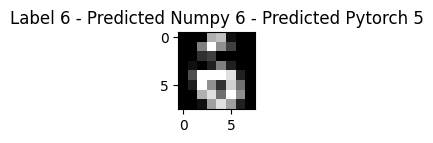

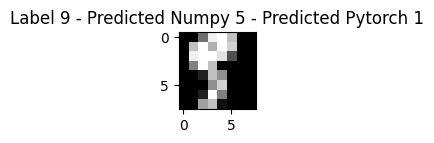

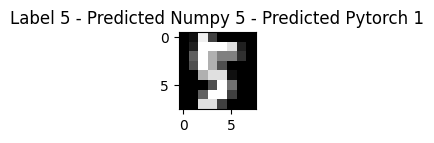

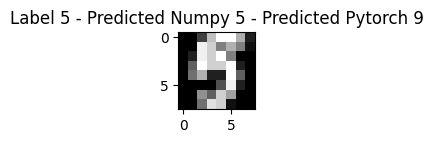

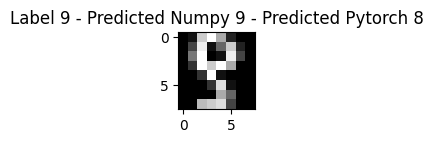

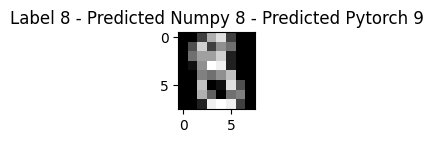

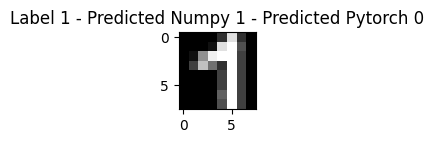

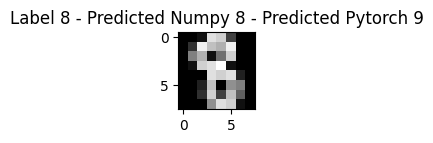

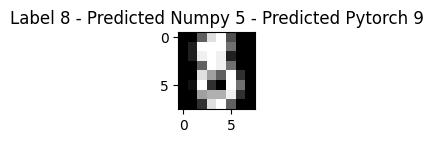

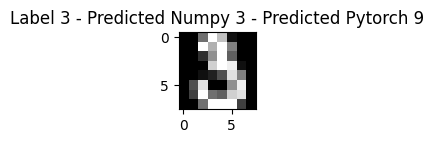

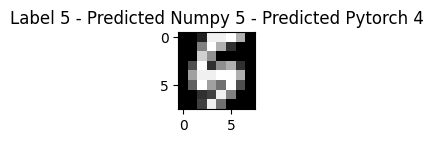

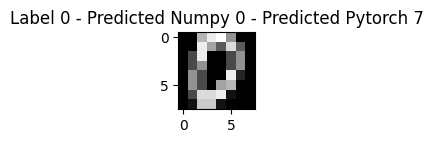

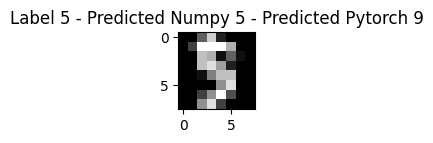

In [36]:
for i, true_label in enumerate(y_test):
    pred_1 = pred_nn_model[i]
    pred_2 = pred_pytorch[i].item()
    true_label = np.argmax(true_label)
    if pred_1 != true_label or pred_2 != true_label:
        image = np.reshape(X_test[i], (8, 8))
        plt.figure(figsize=(3,1))
        plt.imshow(image, cmap='gray')
        plt.title(f'Label {true_label} - Predicted Numpy {pred_1} - Predicted Pytorch {pred_2}')
    
        plt.show()
        

### Exercice 13 - Use a convolutional neuronal network instead of a linear network (optional)

In [37]:
class ConvNetwork(nn.Module):
    def __init__(self):
        super(ConvNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(10, 10, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(640, 10)
            )
        
    def forward(self, x):
        logits = self.model(x)
        return logits
    
       
    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size, learning_rate):
        epoch_loss_train = []
        epoch_loss_val = []
        batch_loss = []
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(self.model.parameters(), lr=learning_rate)  
        for idx_epoch in range(epochs):
            # iterate over minibatches
            indices = np.arange(X_train.shape[0])
            random.shuffle(indices)
            batch_num = 1
            for start_idx in range(0, indices.shape[0] - batch_size + 1, batch_size):
                batch_idx = indices[start_idx:start_idx + batch_size]
                optimizer.zero_grad()

                X_batch = torch.from_numpy(X_train[batch_idx])
                y_batch = torch.from_numpy(y_train[batch_idx])
                
                self.forward(X_batch.float())
                
                outputs = self.model(X_batch.float())
                loss = criterion(outputs, y_batch)
                
                loss.backward()
                optimizer.step()
                batch_loss.append(loss.item())
            
            pred_train = self.model(torch.from_numpy(X_train).float())
            loss_train = criterion(pred_train, torch.from_numpy(y_train).float())
            
            pred_val = self.model(torch.from_numpy(X_val).float())
            loss_val = criterion(pred_val, torch.from_numpy(y_val).float())
            print(f'Loss: {loss.item()} - {loss_val.item()}')
            epoch_loss_train.append(loss_train.item() )
            epoch_loss_val.append(loss_val.item() )

        return epoch_loss_train, epoch_loss_val, batch_loss
    
    def compute_accuracy(self, X_values, y_values):
        pred = torch.argmax(self.model(torch.from_numpy(X_values).float()), 1)
        return ((pred.detach().numpy() == np.argmax(y_values, axis=1)).sum()/len(pred))

In [38]:
X_train_conv = X_train.reshape(len(X_train), 8, 8)
X_train_conv =  np.expand_dims(X_train_conv, 1)
X_val_conv = X_val.reshape(len(X_val), 8, 8)
X_val_conv =  np.expand_dims(X_val_conv, 1)
X_test_conv = X_test.reshape(len(X_test), 8, 8)
X_test_conv =  np.expand_dims(X_test_conv, 1)


In [39]:
conv_nn = ConvNetwork()
loss_train, loss_val, batch_loss = conv_nn.train(X_train_conv, y_train, X_val_conv, y_val, 150, 16, 1e-3)

Loss: 1.5042918920516968 - 1.645622730255127
Loss: 0.8271365594118834 - 0.9210940599441528
Loss: 0.706766591174528 - 0.5708540081977844
Loss: 0.27393974538426846 - 0.44512709975242615
Loss: 0.16519694178714417 - 0.36990684270858765
Loss: 0.2032021408667788 - 0.2998065650463104
Loss: 0.16713022852491122 - 0.26730820536613464
Loss: 0.10104679971118458 - 0.2647327482700348
Loss: 0.25677699060179293 - 0.23164476454257965
Loss: 0.26705286894502933 - 0.2217327207326889
Loss: 0.17039863020727353 - 0.21498887240886688
Loss: 0.08675701946776826 - 0.2195943295955658
Loss: 0.11724590958419867 - 0.19644856452941895
Loss: 0.0258011294354219 - 0.19985654950141907
Loss: 0.17877129865519237 - 0.18481850624084473
Loss: 0.20678054667860124 - 0.18335328996181488
Loss: 0.06830046919640154 - 0.18280825018882751
Loss: 0.02142519279004773 - 0.17673471570014954
Loss: 0.11122659642751387 - 0.17165327072143555
Loss: 0.013831959886374534 - 0.16665494441986084
Loss: 0.0601455630203418 - 0.16837604343891144
Loss: 

In [40]:
print(f'Accuracy for train set: {conv_nn.compute_accuracy(X_train_conv, y_train)}')

Accuracy for train set: 0.9978165938864629


In [41]:
print(f'Accuracy for validation set: {conv_nn.compute_accuracy(X_val_conv, y_val)}')

Accuracy for validation set: 0.9423868312757202


In [42]:
print(f'Accuracy for test set: {conv_nn.compute_accuracy(X_test_conv, y_test)}')

Accuracy for test set: 0.9777777777777777
